In [104]:
%reset -f


# Data Loading from Food Access Research 
## Simple imputation without grouping 

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os 
import importlib

In [157]:
sys.path.append(os.path.abspath(".."))
import utility
print(dir(utility))




['KNNImputer', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'apply_knn_imputer', 'get_binary_and_continuous_columns', 'get_statistical_analysis', 'missing_report', 'np', 'pd', 'plot_boxplots', 'plt', 'smart_impute', 'sns']


In [158]:
importlib.reload(utility)

<module 'utility' from '/Users/txjxs/Desktop/datathon/DSA-Datathon-2025/utility.py'>

In [159]:
FoodAccesResearch_df = pd.read_csv("../DATA/FoodAccessResearchAtlasData2019.csv")
FoodAccesResearch_df.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.00,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.34,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.00,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.00,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.68,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0


In [160]:
FoodAccesResearch_df_Analysis = utility.get_statistical_analysis(FoodAccesResearch_df)
FoodAccesResearch_df_Analysis

,Datatype,Mean,Median,Unique Count,Null Count,Null Percentage,Std,Variance
Column,,,,,,,,
CensusTract,int64,2.782573e+10,2.712979e+10,72531,0,0.000000,1.581647e+10,2.501607e+20
State,object,NaN,NaN,51,0,0.000000,NaN,NaN
County,object,NaN,NaN,1877,0,0.000000,NaN,NaN
Urban,int64,7.606265e-01,1.000000e+00,2,0,0.000000,4.267040e-01,1.820763e-01
Pop2010,int64,4.256739e+03,4.011000e+03,9122,0,0.000000,1.955988e+03,3.825888e+06
...,...,...,...,...,...,...,...,...
TractAIAN,float64,4.015232e+01,1.500000e+01,968,4,0.005515,1.773787e+02,3.146320e+04
TractOMultir,float64,3.876646e+02,1.860000e+02,2979,4,0.005515,5.293497e+02,2.802111e+05
TractHispanic,float64,6.959793e+02,2.430000e+02,5256,4,0.005515,1.119473e+03,1.253219e+06


Columns with missing values above 50 Missing (%):
['lanhopi20', 'lalowi20', 'lanhopi20share', 'laaian20', 'laaian20share', 'laomultir20', 'laomultir20share', 'lahisp20', 'lahunv20', 'lasnap20', 'lapop20', 'lapop20share', 'lahisp20share', 'lalowi20share', 'lawhite20', 'lakids20', 'laasian20', 'lablack20share', 'lablack20', 'lawhite20share', 'laasian20share', 'laseniors20', 'lakids20share', 'laseniors20share', 'lahunv20share', 'lasnap20share', 'laasian10share', 'laseniors10', 'lablack10share', 'lablack10', 'lawhite10share', 'lawhite10', 'laseniors10share', 'lalowi10share', 'lakids10share', 'lakids10', 'lalowi10', 'lapop10share', 'lapop10', 'laasian10', 'lahisp10', 'lanhopi10', 'lasnap10', 'laaian10', 'laaian10share', 'laomultir10', 'laomultir10share', 'lahisp10share', 'lahunv10', 'lanhopi10share', 'lasnap10share', 'lahunv10share']


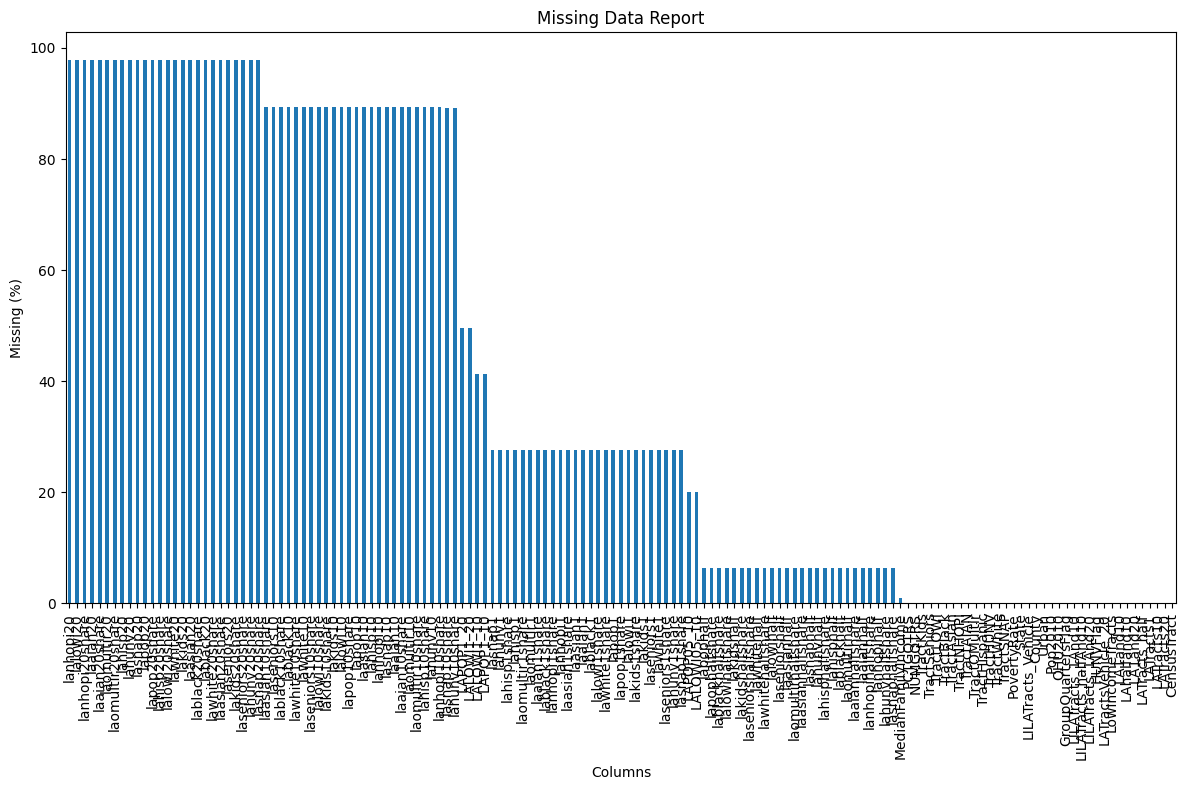

In [161]:
x = utility.missing_report(FoodAccesResearch_df, threshold=50)


Columns with missing values above 50 Missing (%):
[]


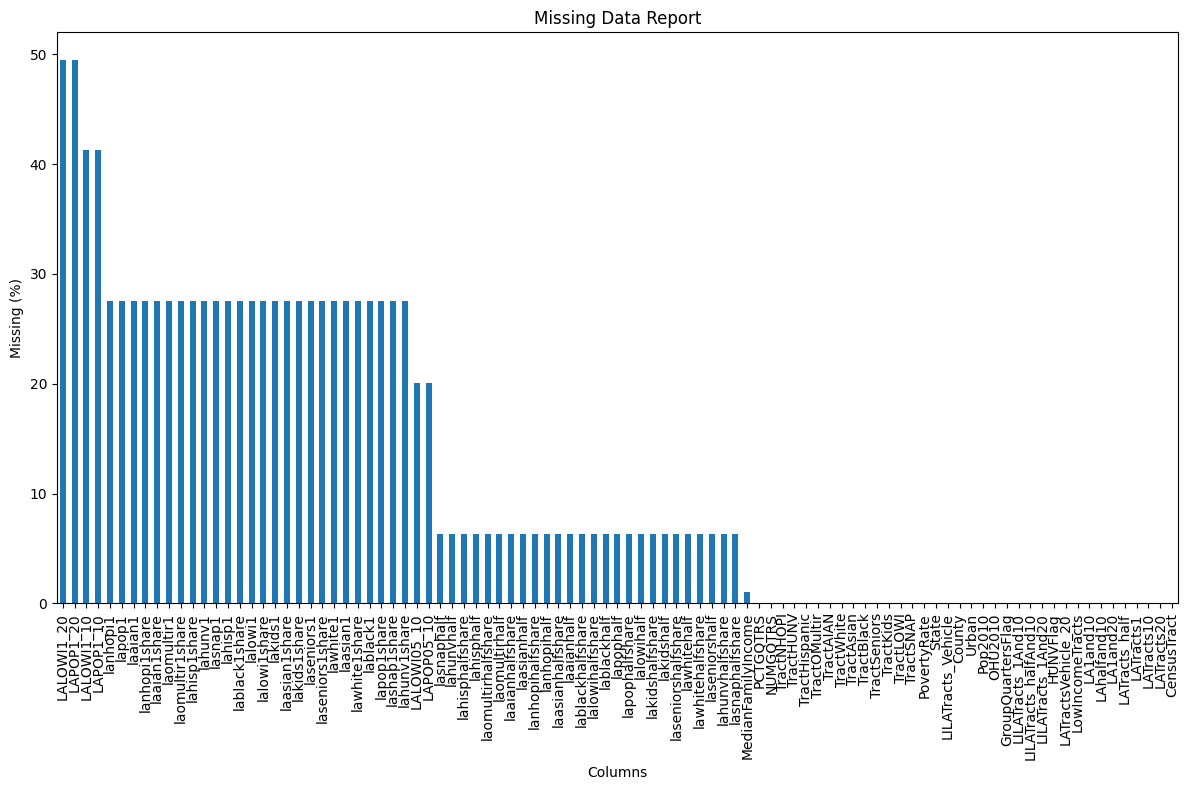

[]

In [162]:
FoodAccesResearch_df.drop(axis=1,columns=x, inplace=True)
utility.missing_report(FoodAccesResearch_df, threshold=50)

Columns with missing values above 30 Missing (%):
['LALOWI1_20', 'LAPOP1_20', 'LALOWI1_10', 'LAPOP1_10']


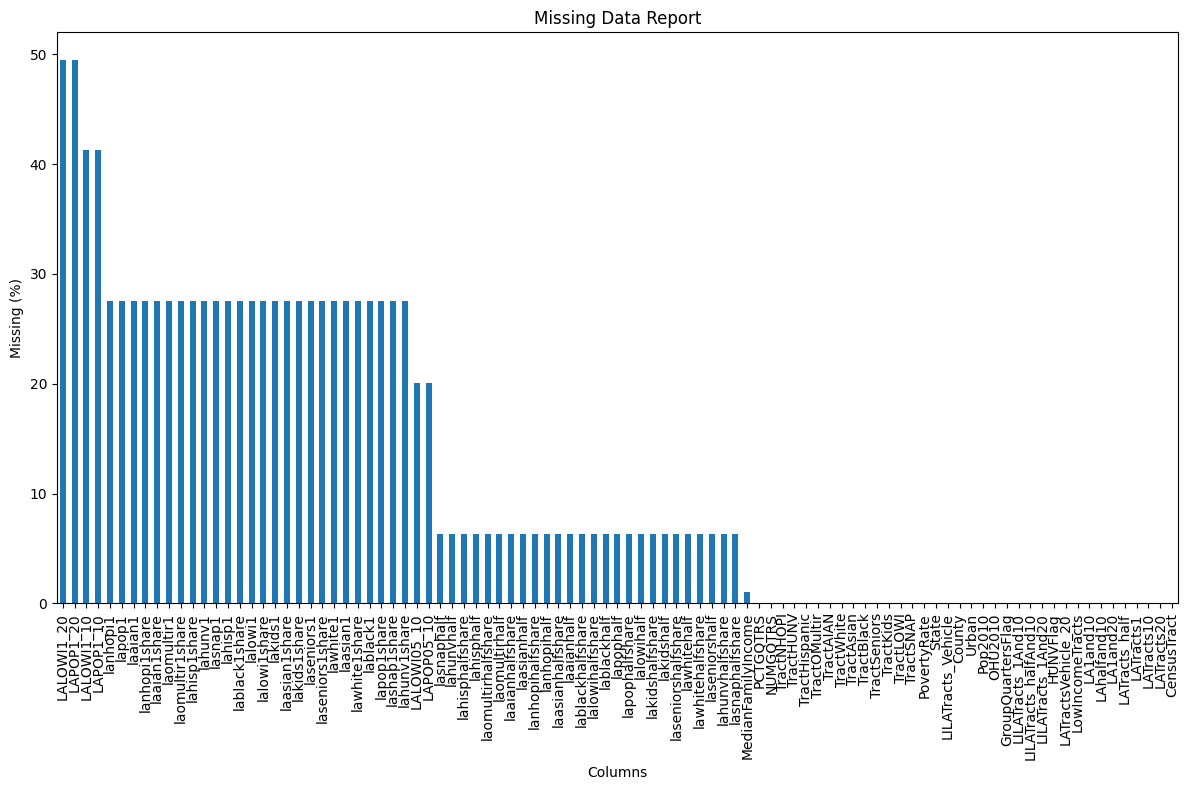

In [163]:
KNN_imputing_cols = utility.missing_report(FoodAccesResearch_df, threshold=30)

In [164]:
FoodAccesResearch_df = utility.apply_knn_imputer(FoodAccesResearch_df, KNN_imputing_cols)

KeyboardInterrupt: 

In [ ]:
FoodAccesResearch_df.head()

In [ ]:
Cols_to_Impute = utility.missing_report(FoodAccesResearch_df, threshold=0)

In [ ]:
FoodAccesResearch_df = utility.smart_impute(FoodAccesResearch_df, Cols_to_Impute)

In [ ]:
utility.missing_report(FoodAccesResearch_df, threshold=0)

In [ ]:
FoodAccesResearch_df['is_desert'] = (((FoodAccesResearch_df['LILATracts_halfAnd10'] == 1) | (FoodAccesResearch_df['LILATracts_1And20'] == 1)) & (FoodAccesResearch_df['HUNVFlag'] == 1)).astype(int)

# Check the resulting distribution of is_desert
print(FoodAccesResearch_df['is_desert'].value_counts())

In [ ]:
FoodAccesResearch_df_Analysis = utility.get_statistical_analysis(FoodAccesResearch_df)
FoodAccesResearch_df_Analysis

In [ ]:
FoodAccesResearch_df.to_csv("../DATA/FoodAccessAtlascleaned.csv", index=False)

## imputing with grouping on county 

In [ ]:
FoodAccesResearch_df = pd.read_csv("../DATA/FoodAccessResearchAtlasData2019.csv")

Columns with missing values above 50 Missing (%):
['lanhopi20', 'lalowi20', 'lanhopi20share', 'laaian20', 'laaian20share', 'laomultir20', 'laomultir20share', 'lahisp20', 'lahunv20', 'lasnap20', 'lapop20', 'lapop20share', 'lahisp20share', 'lalowi20share', 'lawhite20', 'lakids20', 'laasian20', 'lablack20share', 'lablack20', 'lawhite20share', 'laasian20share', 'laseniors20', 'lakids20share', 'laseniors20share', 'lahunv20share', 'lasnap20share', 'laasian10share', 'laseniors10', 'lablack10share', 'lablack10', 'lawhite10share', 'lawhite10', 'laseniors10share', 'lalowi10share', 'lakids10share', 'lakids10', 'lalowi10', 'lapop10share', 'lapop10', 'laasian10', 'lahisp10', 'lanhopi10', 'lasnap10', 'laaian10', 'laaian10share', 'laomultir10', 'laomultir10share', 'lahisp10share', 'lahunv10', 'lanhopi10share', 'lasnap10share', 'lahunv10share']


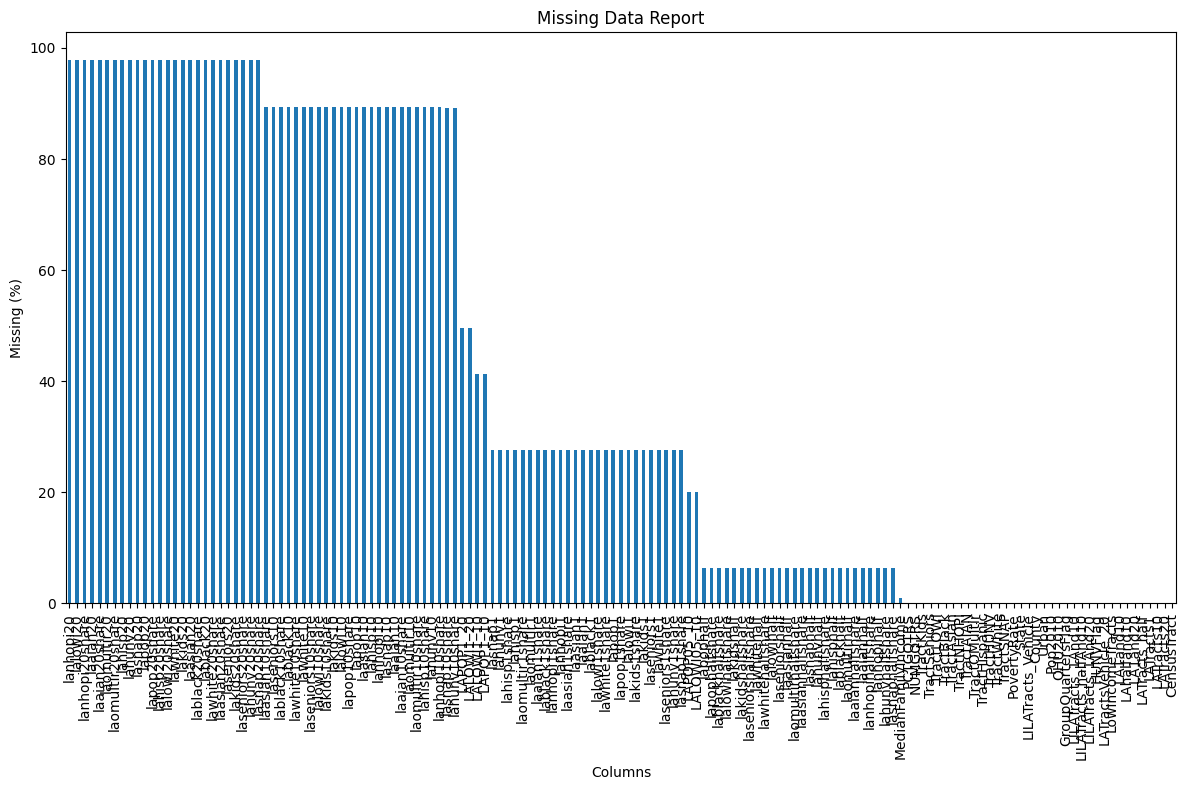

In [ ]:
col_to_drop = utility.missing_report(FoodAccesResearch_df, threshold=50)

Columns with missing values above 50 Missing (%):
[]


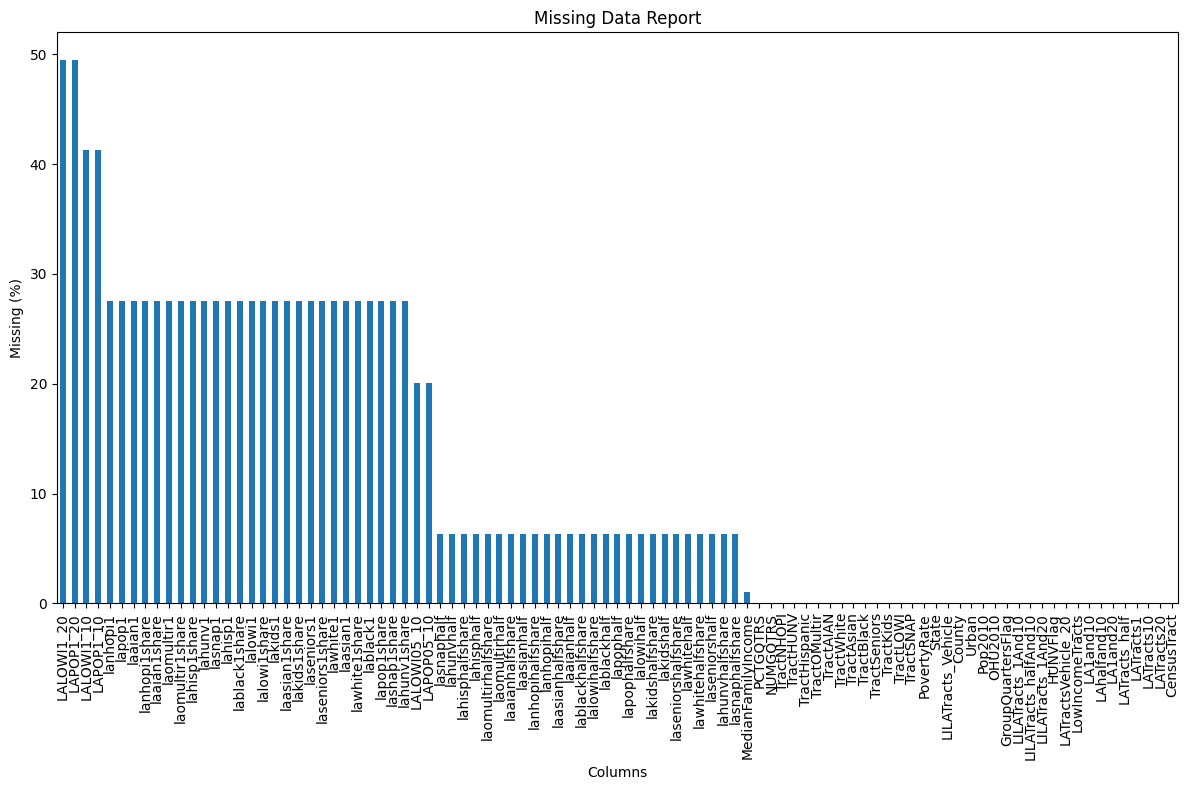

[]

In [ ]:
FoodAccesResearch_df.drop(axis=1,columns=col_to_drop, inplace=True)
utility.missing_report(FoodAccesResearch_df, threshold=50)

Columns with missing values between 0 and 30 Missing (%):
['lanhopi1', 'lapop1', 'laaian1', 'lanhopi1share', 'laaian1share', 'laomultir1', 'laomultir1share', 'lahisp1share', 'lahunv1', 'lasnap1', 'lahisp1', 'lablack1share', 'lalowi1', 'lalowi1share', 'lakids1', 'laasian1share', 'lakids1share', 'laseniors1', 'laseniors1share', 'lawhite1', 'laasian1', 'lawhite1share', 'lablack1', 'lapop1share', 'lasnap1share', 'lahunv1share', 'LALOWI05_10', 'LAPOP05_10', 'lasnaphalf', 'lahunvhalf', 'lahisphalfshare', 'lahisphalf', 'laomultirhalfshare', 'laomultirhalf', 'laaianhalfshare', 'laasianhalf', 'lanhopihalfshare', 'lanhopihalf', 'laasianhalfshare', 'laaianhalf', 'lablackhalfshare', 'lalowihalfshare', 'lablackhalf', 'lapophalf', 'lapophalfshare', 'lalowihalf', 'lakidshalfshare', 'lakidshalf', 'laseniorshalfshare', 'lawhitehalf', 'lawhitehalfshare', 'laseniorshalf', 'lahunvhalfshare', 'lasnaphalfshare', 'MedianFamilyIncome', 'PCTGQTRS', 'NUMGQTRS', 'TractNHOPI', 'TractHUNV', 'TractHispanic', 'Tract

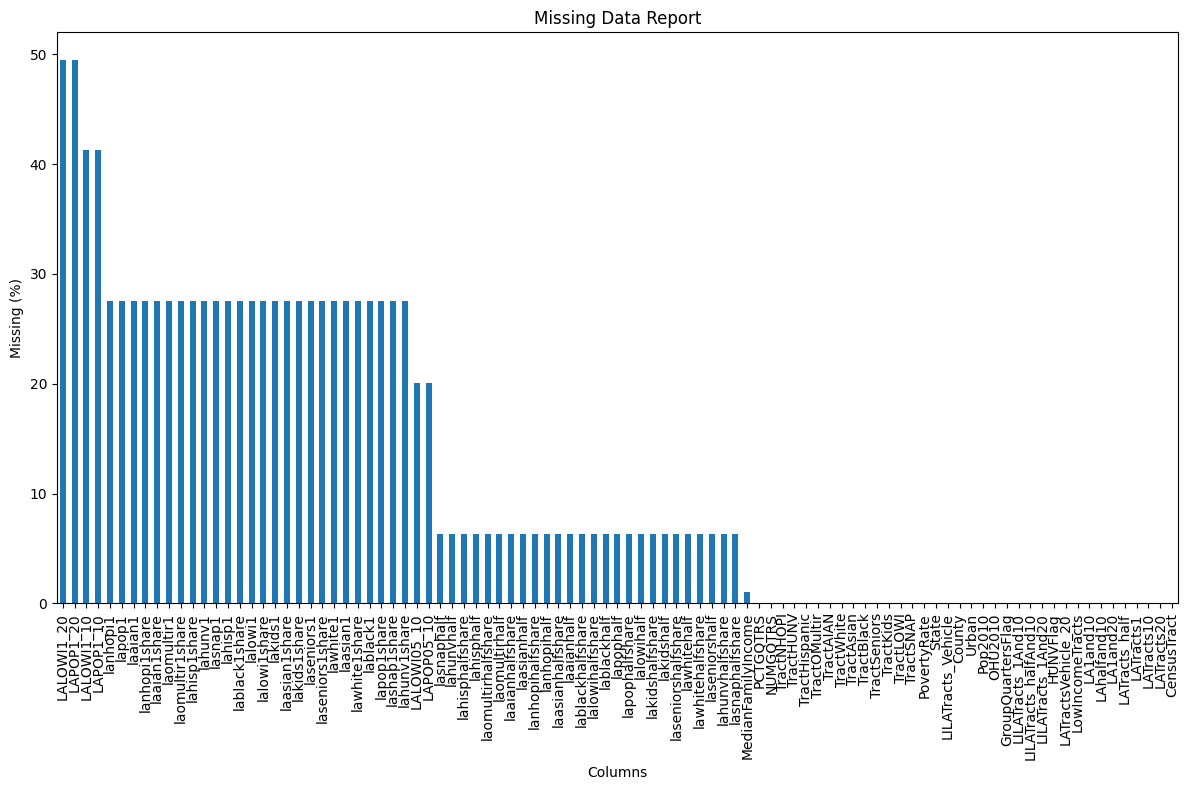

In [ ]:
Cols_to_Impute = utility.missing_report(FoodAccesResearch_df, threshold=(0, 30))

In [ ]:
FoodAccesResearch_df = utility.smart_impute(FoodAccesResearch_df, cols=["TractSNAP"], group_col="County")

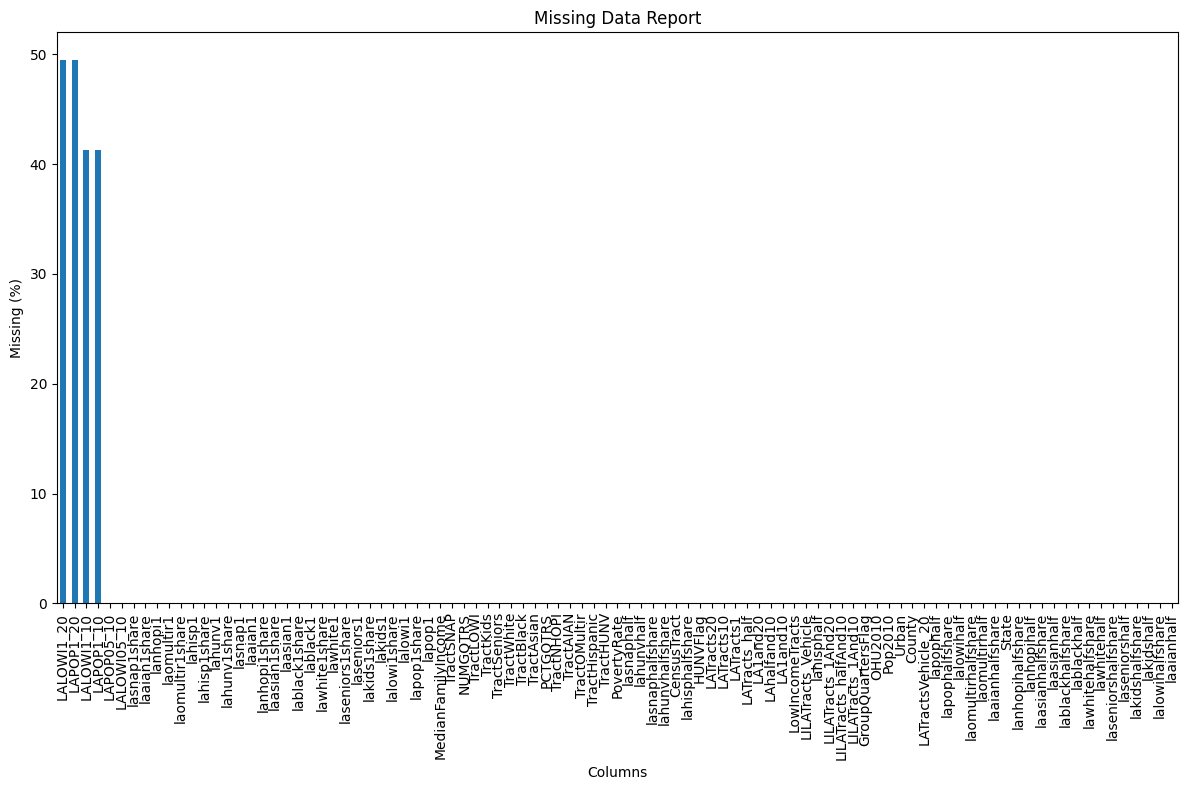

In [ ]:
utility.missing_report(FoodAccesResearch_df)

Columns with missing values above 30 Missing (%):
['LALOWI1_20', 'LAPOP1_20', 'LALOWI1_10', 'LAPOP1_10']


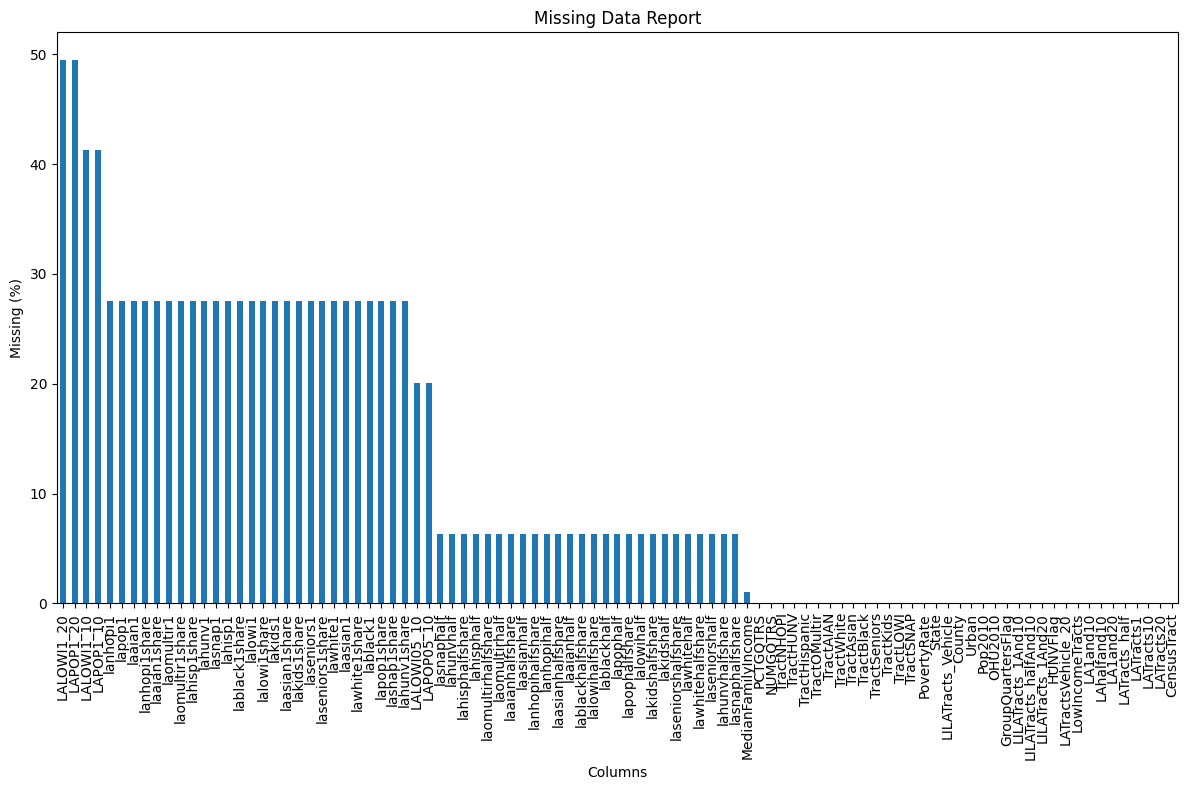

In [ ]:
knn_imputing_cols = utility.missing_report(FoodAccesResearch_df, threshold=30)

In [ ]:

utility.missing_report(FoodAccesResearch_df, threshold=0)

In [ ]:
FoodAccesResearch_df = utility.apply_knn_imputer(FoodAccesResearch_df, knn_imputing_cols)

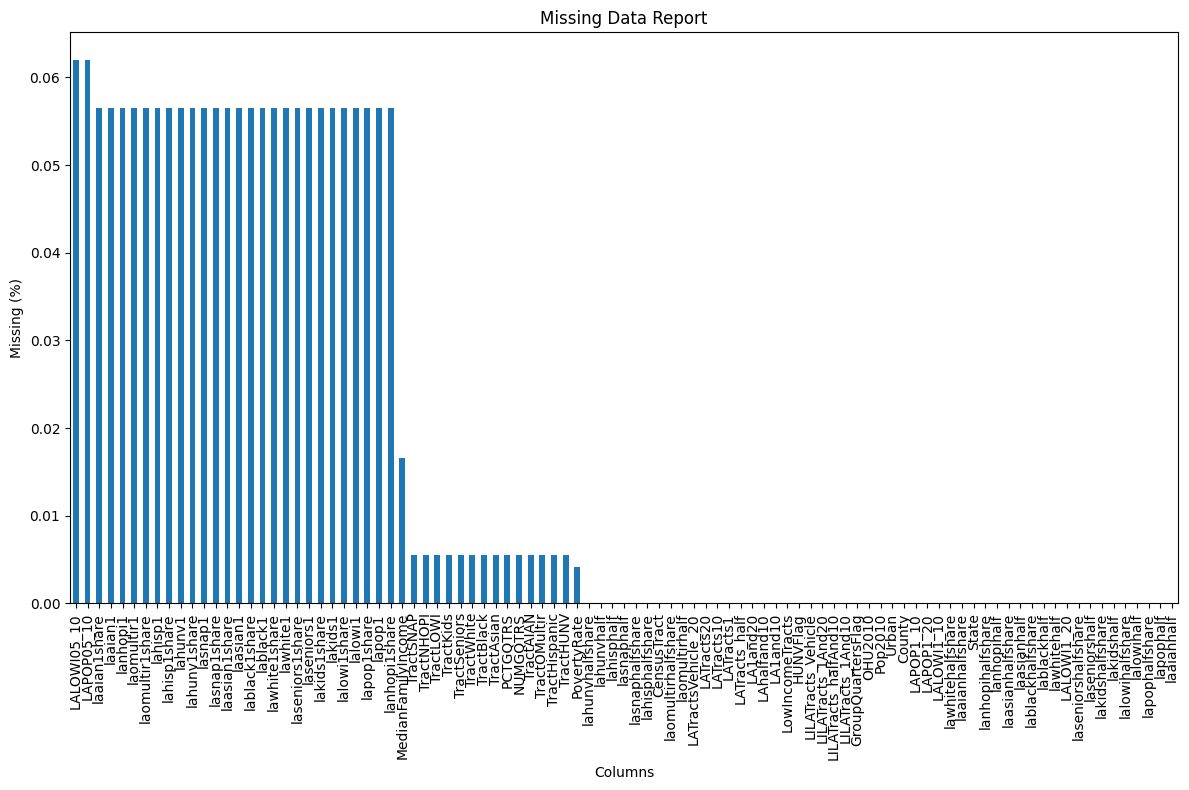

In [ ]:

utility.missing_report(FoodAccesResearch_df)

In [ ]:
missing_columns = FoodAccesResearch_df.columns[FoodAccesResearch_df.isnull().sum() > 0].tolist()
print("Columns with missing values:", missing_columns)


Columns with missing values: ['NUMGQTRS', 'PCTGQTRS', 'PovertyRate', 'MedianFamilyIncome', 'LAPOP05_10', 'LALOWI05_10', 'lapop1', 'lapop1share', 'lalowi1', 'lalowi1share', 'lakids1', 'lakids1share', 'laseniors1', 'laseniors1share', 'lawhite1', 'lawhite1share', 'lablack1', 'lablack1share', 'laasian1', 'laasian1share', 'lanhopi1', 'lanhopi1share', 'laaian1', 'laaian1share', 'laomultir1', 'laomultir1share', 'lahisp1', 'lahisp1share', 'lahunv1', 'lahunv1share', 'lasnap1', 'lasnap1share', 'TractLOWI', 'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP']


In [ ]:
FoodAccesResearch_df_1 = utility.smart_impute(FoodAccesResearch_df, cols=missing_columns)

Columns with missing values above 0 Missing (%):
[]


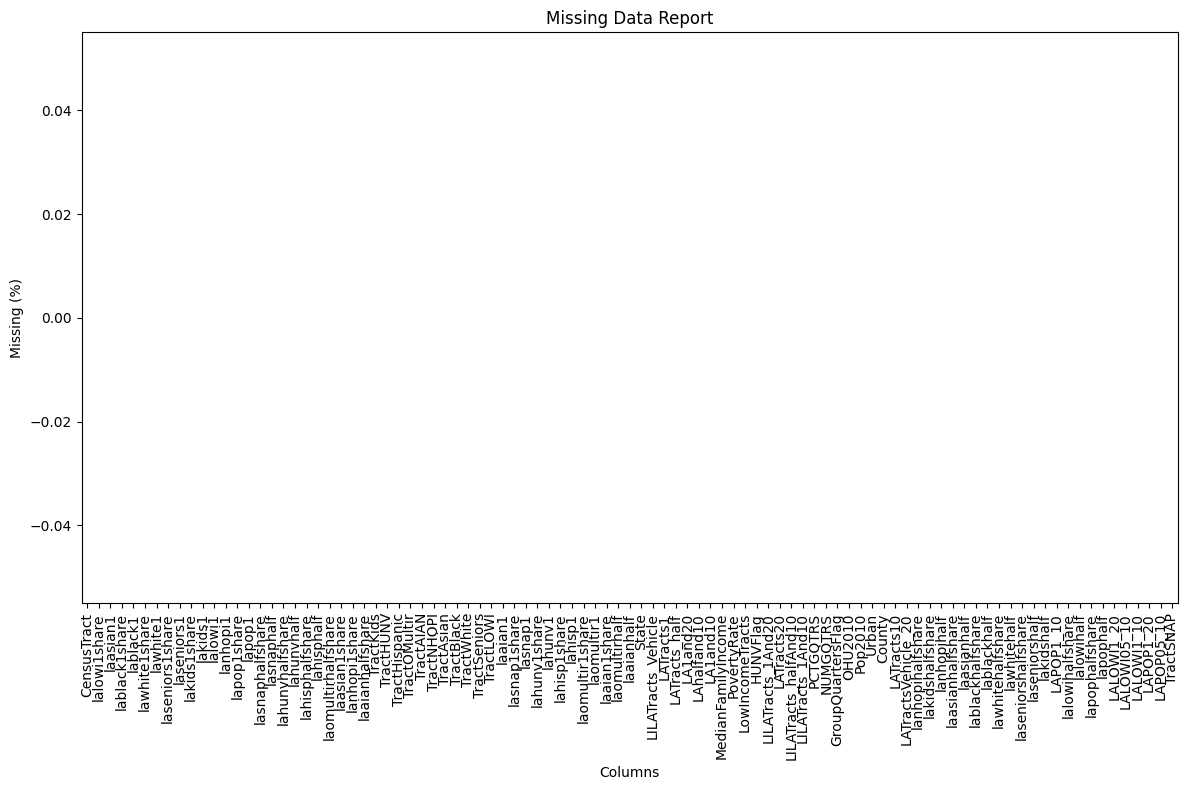

[]

In [ ]:
utility.missing_report(FoodAccesResearch_df_1, threshold=0)


In [ ]:
FoodAccesResearch_df_1['is_desert'] = (((FoodAccesResearch_df_1['LILATracts_halfAnd10'] == 1) | (FoodAccesResearch_df_1['LILATracts_1And20'] == 1)) & (FoodAccesResearch_df_1['HUNVFlag'] == 1)).astype(int)    

In [ ]:
FoodAccesResearch_df_1.to_csv("../DATA/FoodAccessAtlascleaned_groupedbyCounty.csv", index=False)

## Model Building with non-grouped data


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# 1. Load your cleaned dataset
df = pd.read_csv("../DATA/FoodAccessAtlascleaned.csv")

# Ensure your target variable is present (drop rows with missing target values)
df = df.dropna(subset=['is_desert'])

# 2. Select only numeric columns (assuming 'is_desert' is numeric/binary)
numeric_df = df.select_dtypes(include='number')

# Define features (X) and target (y)
X = numeric_df.drop(columns=['is_desert'])
y = numeric_df['is_desert']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Set up the RandomForestClassifier as the estimator for RFE
clf = RandomForestClassifier(random_state=42, n_estimators=100)

# 4. Set up RFE to select the top 10 features, with verbose output
# The verbose parameter will print iteration details as the RFE proceeds.
rfe_selector = RFE(estimator=clf, n_features_to_select=10, step=1, verbose=2)

# Fit RFE on the training data
rfe_selector.fit(X_train, y_train)

# 5. Extract the selected feature names
selected_features = X_train.columns[rfe_selector.support_]
print("Selected features using RFE:")
print(selected_features)

# 6. Evaluate model performance using only the selected features
clf.fit(X_train[selected_features], y_train)
accuracy = clf.score(X_test[selected_features], y_test)
print("Test Accuracy with selected features:", accuracy)


Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 fe

In [165]:
best_features_non_grouped = ['LILATracts_halfAnd10', 'LILATracts_Vehicle', 'HUNVFlag',
       'LowIncomeTracts', 'LAhalfand10', 'LATracts_half', 'LATractsVehicle_20',
       'LALOWI05_10', 'lahunvhalf', 'lahunvhalfshare']

## model with grouped data

In [168]:
# 1. Load your cleaned dataset
df = pd.read_csv("../DATA/FoodAccessAtlascleaned_groupedbyCounty.csv")

# Ensure your target variable is present (drop rows with missing target values)
df = df.dropna(subset=['is_desert'])

# 2. Select only numeric columns (assuming 'is_desert' is numeric/binary)
numeric_df = df.select_dtypes(include='number')

# Define features (X) and target (y)
X = numeric_df.drop(columns=['is_desert'])
y = numeric_df['is_desert']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Set up the RandomForestClassifier as the estimator for RFE
clf = RandomForestClassifier(random_state=42, n_estimators=100)

# 4. Set up RFE to select the top 10 features, with verbose output
# The verbose parameter will print iteration details as the RFE proceeds.
rfe_selector = RFE(estimator=clf, n_features_to_select=10, step=1, verbose=2)

# Fit RFE on the training data
rfe_selector.fit(X_train, y_train)

# 5. Extract the selected feature names
selected_features = X_train.columns[rfe_selector.support_]
print("Selected features using RFE:")
print(selected_features)

# 6. Evaluate model performance using only the selected features
clf.fit(X_train[selected_features], y_train)
accuracy = clf.score(X_test[selected_features], y_test)
print("Test Accuracy with selected features:", accuracy)

Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 fe

In [169]:
best_features_grouped = ['LILATracts_halfAnd10', 'LILATracts_Vehicle', 'HUNVFlag',
       'LowIncomeTracts', 'PovertyRate', 'LAhalfand10', 'LATracts_half',
       'LATractsVehicle_20', 'lahunvhalf', 'lahunvhalfshare']

In [170]:
best_features_non_grouped

['LILATracts_halfAnd10',
 'LILATracts_Vehicle',
 'HUNVFlag',
 'LowIncomeTracts',
 'LAhalfand10',
 'LATracts_half',
 'LATractsVehicle_20',
 'LALOWI05_10',
 'lahunvhalf',
 'lahunvhalfshare']